In [25]:
#Question 1
import pandas as pd
import numpy as nm


data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='Purchase data')

# data=pd.read_excel(sheet, 'Purchase data')
A=['Candies (#)','Mangoes (Kg)','Milk Packets (#)']
a=pd.read_excel(r"Lab Session Data.xlsx",usecols=A)
C=['Payment (Rs)']
c=pd.read_excel(r"Lab Session Data.xlsx",usecols=C)

dimen=a.shape[1]
vec_count=a.shape[0]
rank=nm.linalg.matrix_rank(a)
pseudoinv=nm.linalg.pinv(a)

print("The dimensionality is", dimen)
print("The numbers of vs is", vec_count)
print("The rank is", rank)

The dimensionality is 3
The numbers of vectors is 10
The rank is 3


In [26]:
#Question2
price=nm.dot(pseudoinv,c)
print("The Cost of each product available is", price)

The Cost of each product available is [[ 1.]
 [55.]
 [18.]]


In [2]:
#Question 3

import pandas as pd
import numpy as nm


data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='Purchase data')
data['status'] = data['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR")
print(data[['Payment (Rs)', 'status']].head())


   Payment (Rs) status
0           386   RICH
1           289   RICH
2           393   RICH
3           110   POOR
4           280   RICH


Matplotlib is building the font cache; this may take a moment.


The mean of price is  1560.663453815261
The variance in price is  58732.365352539186
The mean price on wednesdays is  1550.706
The difference between the mean price usually and mean price wednesday's is  9.957453815261033
The mean price in april is  1698.9526315789474
The difference between the mean price usually and mean price in april is  -138.28917776368644
Probability of making a profit on Wednesday 0.42
The probability of profit given it is wedneday is  0.08433734939759036


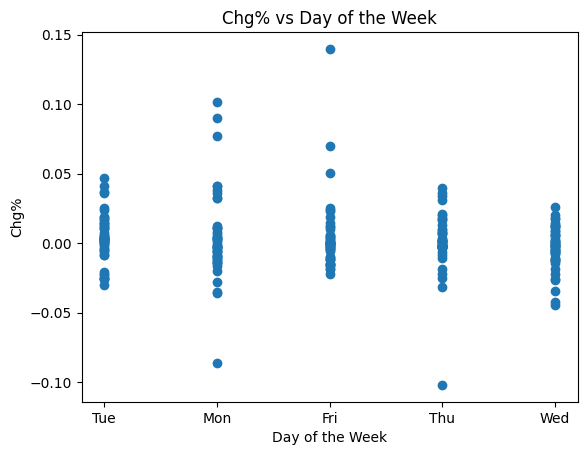

In [20]:
#Question 4
import statistics
import pandas as pd
import matplotlib.pyplot as plot

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='IRCTC Stock Price')

pricedata=data['Price']
daily_mean=statistics.mean(pricedata)
print("The mean of price is ",daily_mean)
print("The variance in price is ",statistics.variance(pricedata))

wed_data=data[data['Day']=='Wed']
mean_wed=statistics.mean(wed_data['Price'])
print("The mean price on wednesdays is ",mean_wed)
print("The difference between the mean price usually and mean price wednesday's is ",daily_mean-mean_wed)

apr_data = data[data['Month']=='Apr']
mean_apr=statistics.mean(apr_data['Price'])
print("The mean price in april is ",mean_apr)
print("The difference between the mean price usually and mean price in april is ",daily_mean-mean_apr)

"""chgdata=data['Chg%']
prob_loss = len(chgdata[chgdata < 0]) / len(chgdata)
print("The probability of loss is ",prob_loss)"""

prob_profit_wednesday = len(wed_data[wed_data['Chg%'] > 0]) / len(wed_data)
print("Probability of making a profit on Wednesday", prob_profit_wednesday)

inv_denom=(len(wed_data) / len(data))
conditional_prob = prob_profit_wednesday *inv_denom
print("The probability of profit given it is wedneday is ",conditional_prob)


plot.scatter(data['Day'], data['Chg%'])
plot.xlabel('Day of the Week')
plot.ylabel('Chg%')
plot.title('Chg% vs Day of the Week')
plot.show()

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

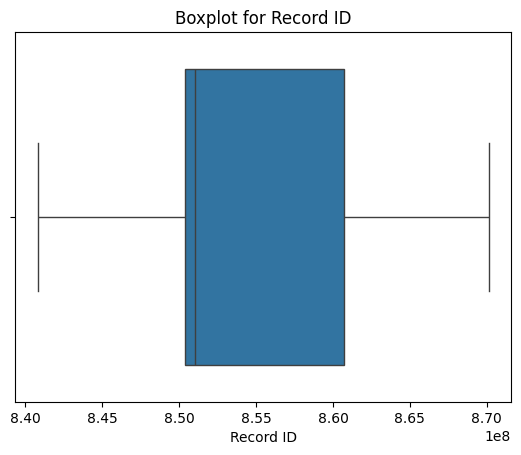

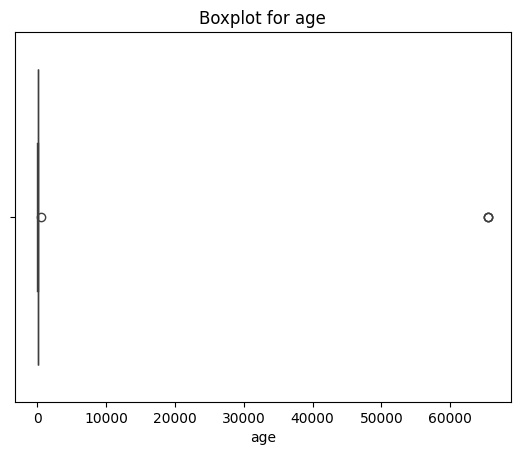

Mean and std. deviation for Record ID is  852947346.6122983  and  7581968.7803465845
Mean and std. deviation for age is  73.55582206716092  and  1183.976718044466


In [44]:
#Question 5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
print(data.dtypes)
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64']).columns

for i in cat_cols:
    values=data[i].unique()
    print("Unique values in column",i," ",values)

    if len(values) < 100:
            print(f"Suggested Encoding: Label Encoding")
            data[i] = data[i].astype('category').cat.codes
    else:
        print(f"Suggested Encoding: One-Hot Encoding")
        data = pd.get_dummies(data, columns=[i], prefix=[i])

for i in num_cols:
    print("Data range for numeric attributes such as", i," is ",data[i].min()," to ",data[i].max())

data.replace('?', np.nan, inplace=True)

print("Number of missing values in each feature")
missing_values = data.isnull().sum()
print(missing_values)

print("\nOutliers in Numeric Data:")
for i in num_cols:
    sns.boxplot(x=data[i])
    plt.title("Boxplot for {}".format(i))
    plt.show()


for i in num_cols:
    print("Mean and std. deviation for", i, "is ", data[i].mean()," and ", data[i].std())

In [41]:
#Question 6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
data.replace('?', np.nan, inplace=True)

num_cols = data.select_dtypes(include=['int64']).columns

for i in num_cols:
    if data[i].isnull().sum() > 0:
        if data[i].skew() < 1:
            data[i].fillna(data[i].mean(), inplace=True)
            print("Column: {}, Imputation Method: Mean".format(i))
        else:
            data[i].fillna(data[i].median(), inplace=True)
            print("Column: {}, Imputation Method: Median".format(i))

for i in cat_cols:
    if data[i].isnull().sum() > 0:
        data[i].fillna(data[i].mode()[0], inplace=True)
        print("Column: {}, Imputation Method: Mode".format(i))

Column: sex, Imputation Method: Mode
Column: TSH, Imputation Method: Mode
Column: T3, Imputation Method: Mode
Column: TT4, Imputation Method: Mode
Column: T4U, Imputation Method: Mode
Column: FTI, Imputation Method: Mode
Column: TBG, Imputation Method: Mode


C:\Users\prana\AppData\Local\Temp\ipykernel_2500\3554800182.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_2500\3554800182.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], i

In [ ]:
pip install scikit-learn


   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
    --------------------------------------- 0.3/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.9 MB 985.5 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/10.9 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/10.9 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/10.9 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/10.9 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/10.9 MB 1.4 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/10.9 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/10.9 MB 1.5 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/10.9 MB 1.6 MB/s eta 0:00:06
   ------------- -------------------------- 3.7/10.9 MB 1.6 MB/s eta 0:00:05
   --------------- ------------------------ 4.2/10.9 MB 1.7 MB/s eta 0:00:05
   -------

In [58]:
#Question 7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
print(data[num_cols].describe())
#high standard deviation for age
scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])

print("Z-score Normalized 'age' Column:")
print(data['age'])

          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000
Z-score Normalized 'age' Column:
0      -0.037634
1      -0.037634
2      -0.027499
3      -0.031722
4      -0.035100
          ...   
9167   -0.014829
9168   -0.043547
9169   -0.003848
9170   -0.022431
9171   -0.035945
Name: age, Length: 9172, dtype: float64


In [65]:
#Question 8
import pandas as pd
import numpy as np


data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
data.replace('?', np.nan, inplace=True)
print("For thyroid sheet")

binary_cols = [col for col in data.columns if set(data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols += [col for col in data.columns if set(data[col].dropna().unique()) <= {'M', 'F'}]

data[binary_cols] = data[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

v1 = data.loc[0, binary_cols].astype(int)
v2 = data.loc[1, binary_cols].astype(int)


f11 = np.sum((v1 == 1) & (v2 == 1))
f00 = np.sum((v1 == 0) & (v2 == 0))
f10 = np.sum((v1 == 1) & (v2 == 0))
f01 = np.sum((v1 == 0) & (v2 == 1))

jc = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='marketing_campaign')
data.replace('?', np.nan, inplace=True)
print("For marketing sheet")

binary_cols = [col for col in data.columns if set(data[col].dropna().unique()) <= {0, 1}]


data[binary_cols] = data[binary_cols]

v1 = data.loc[0, binary_cols].astype(int)
v2 = data.loc[1, binary_cols].astype(int)


f11 = np.sum((v1 == 1) & (v2 == 1))
f00 = np.sum((v1 == 0) & (v2 == 0))
f10 = np.sum((v1 == 1) & (v2 == 0))
f01 = np.sum((v1 == 0) & (v2 == 1))

jc = f11 / (f01 + f10 + f11)
smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

C:\Users\prana\AppData\Local\Temp\ipykernel_2500\649458354.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_2500\649458354.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_cols] = data[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})


For thyroid sheet
Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.8571428571428571
For marketing sheet
Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.8571428571428571


In [68]:
#Question 9
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
data.replace('?', np.nan, inplace=True)

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].mean(), inplace=True)
    
    v1 = data.iloc[0].values.reshape(1, -1)
v2 = data.iloc[1].values.reshape(1, -1)


cos_sim = cosine_similarity(v1, v2)[0][0]

print("Cosine Similarity:", cos_sim)

Cosine Similarity: 0.9999999999999998


C:\Users\prana\AppData\Local\Temp\ipykernel_2500\2964078691.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_2500\2964078691.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mo

C:\Users\prana\AppData\Local\Temp\ipykernel_2500\117090499.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_2500\117090499.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_cols] = data[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})
C:\Users\prana\AppData\Local\Temp\ipykernel_2500\117090499.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace meth

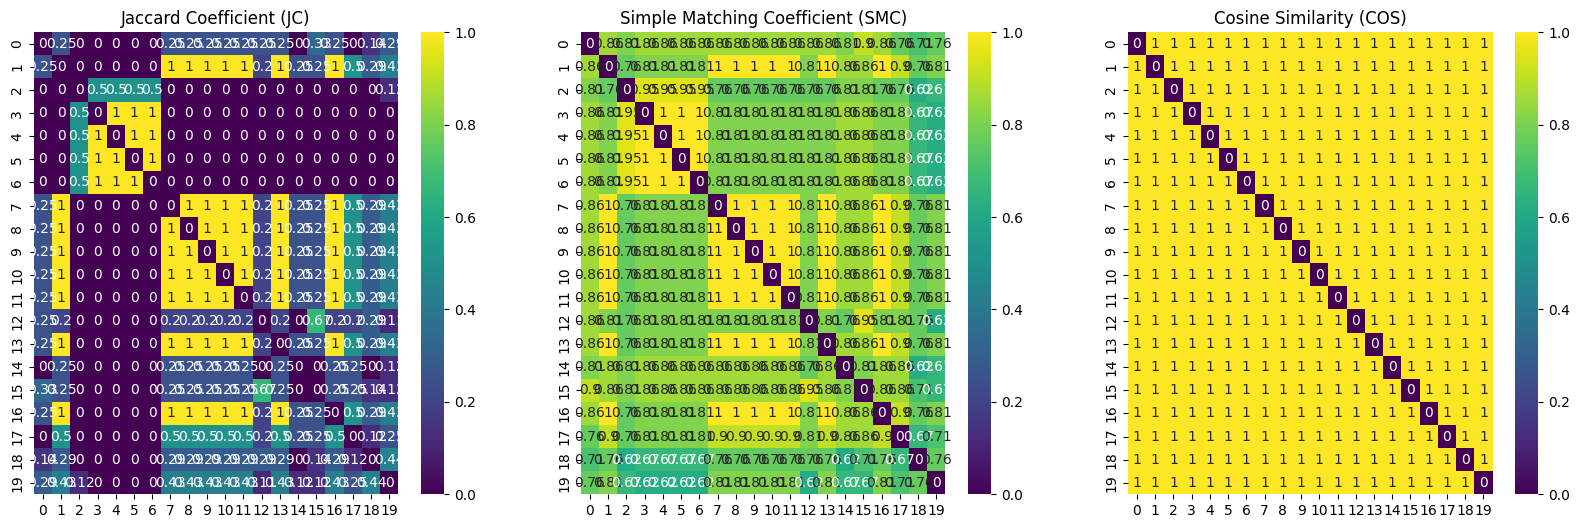

In [70]:
#Question 10

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
data.replace('?', np.nan, inplace=True)

binary_cols = [col for col in data.columns if set(data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols += [col for col in data.columns if set(data[col].dropna().unique()) <= {'M', 'F'}]

data[binary_cols] = data[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].mean(), inplace=True)

subset_data = data.iloc[:20]
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i != j:
            v1 = subset_data.iloc[i, :].values
            v2 = subset_data.iloc[j, :].values

            v1_bin = subset_data.loc[i, binary_cols].astype(int)
            v2_bin = subset_data.loc[j, binary_cols].astype(int)

            f11 = np.sum((v1_bin == 1) & (v2_bin == 1))
            f00 = np.sum((v1_bin == 0) & (v2_bin == 0))
            f10 = np.sum((v1_bin == 1) & (v2_bin == 0))
            f01 = np.sum((v1_bin == 0) & (v2_bin == 1))

            jc_matrix[i, j] = f11 / (f01 + f10 + f11)
            smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)

            
            v1_all = v1.reshape(1, -1)
            v2_all = v2.reshape(1, -1)
            cos_matrix[i, j] = cosine_similarity(v1_all, v2_all)[0][0]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(jc_matrix, annot=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Jaccard Coefficient (JC)')

sns.heatmap(smc_matrix, annot=True  , cmap='viridis', ax=axs[1])
axs[1].set_title('Simple Matching Coefficient (SMC)')

sns.heatmap(cos_matrix, annot=True, cmap='viridis', ax=axs[2])
axs[2].set_title('Cosine Similarity (COS)')

plt.show()